In [2]:
!wget https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/adresowo_lodz_cleaned.csv

--2025-10-25 08:28:07--  https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/adresowo_lodz_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140154 (137K) [text/plain]
Saving to: ‘adresowo_lodz_cleaned.csv’

adresowo_lodz_clean 100%[===================>] 136,87K  --.-KB/s    in 0,06s   

2025-10-25 08:28:07 (2,39 MB/s) - ‘adresowo_lodz_cleaned.csv’ saved [140154/140154]



In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# === 1. Wczytanie danych ===
url = "adresowo_lodz_cleaned.csv"
df = pd.read_csv(url).dropna(subset=['price_total_zl_cleaned', 'area_m2'])

# === 2. Definicja cech i celu ===
X = df[['area_m2', 'locality', 'rooms', 'owner_direct', 'photos', 'date_posted']]
y = df['price_total_zl_cleaned']

# === 3. Podział na zbiory treningowy/testowy ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [76]:
df

,id,url,date_posted,photos,locality,street,property_type,rooms,area_m2,owner_direct,price_total_zl,price_per_m2_zl,price_total_zl_cleaned,price_per_m2_zl_cleaned
0,3740608,https://adresowo.pl/o/mieszkanie-lodz-baluty-u...,6 dni temu,16.0,Łódź Bałuty,ul. Antoniego Mackiewicza,Mieszkanie,2,47,True,315 000,6 702zł / m²,315000.0,6702.0
1,3747664,https://adresowo.pl/o/mieszkanie-lodz-gorna-ul...,dzisiajnowe,11.0,Łódź Górna,ul. Ignacego Paderewskiego,Mieszkanie,2,37,True,295 000,7 973zł / m²,295000.0,7973.0
2,3747648,https://adresowo.pl/o/mieszkanie-lodz-baluty-u...,dzisiajnowe,11.0,Łódź Bałuty,ul. Rojna,Mieszkanie,2,45,True,309 000,6 847zł / m²,309000.0,6847.0
3,3747458,https://adresowo.pl/o/mieszkanie-lodz-srodmies...,dzisiajnowe,13.0,Łódź Śródmieście,ul. Gdańska,Mieszkanie,5,125,True,699 000,5 614zł / m²,699000.0,5614.0
4,3746066,https://adresowo.pl/o/mieszkanie-lodz-ul-ignac...,dzisiajnowe,10.0,Łódź,ul. Ignacego Paderewskiego,Mieszkanie,2,38,True,365 000,9 605zł / m²,365000.0,9605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,1480239,https://adresowo.pl/o/mieszkanie-lodz-polesie-...,ponad miesiąc temu,8.0,Łódź Polesie,ul. Lipowa,Mieszkanie,2,47,True,360 000,7 660zł / m²,360000.0,7660.0
675,1318647,https://adresowo.pl/o/mieszkanie-lodz-janow-ul...,ponad miesiąc temu,8.0,Łódź Janów,ul. Maćka z Bogdańca,Mieszkanie,3,110,True,880 000,8 000zł / m²,880000.0,8000.0
676,1228215,https://adresowo.pl/o/mieszkanie-lodz-polesie-...,ponad miesiąc temu,12.0,Łódź Polesie,ul. 6 Sierpnia,Mieszkanie,2,65,True,399 000,6 138zł / m²,399000.0,6138.0
677,140420,https://adresowo.pl/o/mieszkanie-lodz-ul-dr-ad...,ponad miesiąc temu,10.0,Łódź,ul. dr. Adama Próchnika,Mieszkanie,4,91,True,730 000,8 003zł / m²,730000.0,8003.0


In [77]:
X_train.head()

,area_m2,locality,rooms,owner_direct,photos,date_posted
430,54,Łódź Księży Młyn,2,True,17.0,ponad miesiąc temu
249,55,Łódź Górna,3,True,20.0,ponad tydzień temu
220,50,Łódź Śródmieście,2,True,13.0,ponad tydzień temu
18,53,Łódź Bałuty,3,True,9.0,dzisiajnowe
244,38,Łódź Polesie,1,True,8.0,ponad tydzień temu


In [78]:
X_test.head()

,area_m2,locality,rooms,owner_direct,photos,date_posted
646,37,Łódź Julianów,2,True,8.0,ponad miesiąc temu
336,118,Łódź Śródmieście,3,True,9.0,ponad miesiąc temu
63,90,Łódź Julianów,3,True,14.0,ponad miesiąc temu
367,44,Łódź Widzew,2,True,8.0,ponad miesiąc temu
101,39,Łódź Dąbrowa,2,True,10.0,6 dni temu


In [79]:
X.isnull().sum()

area_m2         0
locality        0
rooms           0
owner_direct    0
photos          1
date_posted     0
dtype: int64

In [80]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === 4. Imputacja (opcjonalna) ===
imputer = IterativeImputer(random_state=0)

# === 5. Definicja kolumn numerycznych i kategorycznych ===
numeric_features = ['area_m2', 'rooms', 'photos']
categorical_features = ['locality', 'owner_direct', 'date_posted']

In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# === 6. ColumnTransformer: preprocessing ===
preprocessor = ColumnTransformer(
   transformers=[
      ('num', Pipeline([
           ('imputer', imputer),
           #('scaler', StandardScaler())
       ]), numeric_features),
       ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   ]
)


In [107]:
# === 6. ColumnTransformer: preprocessing ===
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# === 7. Pipeline z modelem ===
pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('regressor', DecisionTreeRegressor(
       max_depth=4,
       random_state=42,
   ))
])



In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# === 8. Trening ===
pipeline.fit(X_train, y_train)

# === 9. Predykcja i ocena ===
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.634


[Text(0.5, 0.9, 'x[0] <= 64.5\nsquared_error = 47076086451.267\nsamples = 543\nvalue = 468467.059'),
 Text(0.25, 0.7, 'x[0] <= 45.5\nsquared_error = 14285230555.638\nsamples = 438\nvalue = 398656.888'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[0] <= 31.5\nsquared_error = 6690986044.811\nsamples = 225\nvalue = 331476.049'),
 Text(0.0625, 0.3, 'x[0] <= 26.5\nsquared_error = 4075808485.425\nsamples = 41\nvalue = 244032.195'),
 Text(0.03125, 0.1, 'squared_error = 1112038024.691\nsamples = 18\nvalue = 192744.444'),
 Text(0.09375, 0.1, 'squared_error = 2725602708.507\nsamples = 23\nvalue = 284170.435'),
 Text(0.1875, 0.3, 'x[0] <= 39.5\nsquared_error = 5190235963.647\nsamples = 184\nvalue = 350960.821'),
 Text(0.15625, 0.1, 'squared_error = 5106529513.322\nsamples = 107\nvalue = 336007.794'),
 Text(0.21875, 0.1, 'squared_error = 4564086287.82\nsamples = 77\nvalue = 371739.701'),
 Text(0.375, 0.5, 'x[0] <= 55.5\nsquared_error = 12503659142.988\nsamples = 213\nvalue = 469622.563'),
 T

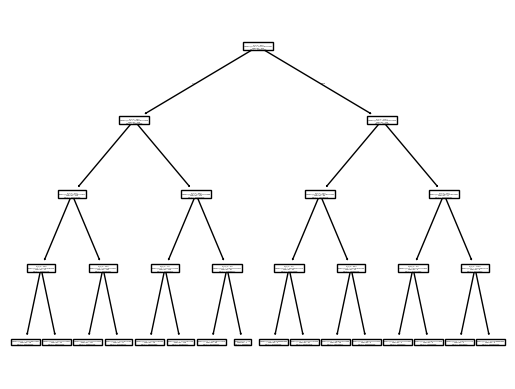

In [110]:
from sklearn import tree

tree.plot_tree(pipeline['regressor'])


R²: 0.634


In [98]:
y_pred_train = pipeline.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print(f"R²: {r2:.3f}")


R²: 0.727


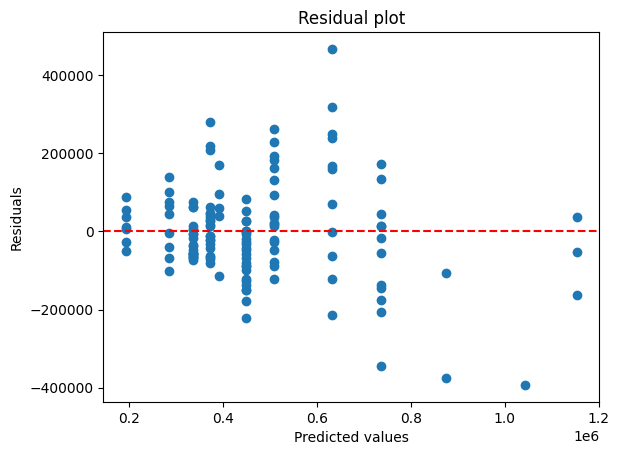

In [99]:
# === 10. Wykres reszt ===
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


In [100]:
# === 11. Predykcja dla nowych danych ===

X_new = pd.DataFrame(
   [[47, 'Łódź Bałuty', 2, True, 16.0, '6 dni temu']],
   columns=['area_m2', 'locality', 'rooms', 'owner_direct', 'photos', 'date_posted']
)
predicted_price = pipeline.predict(X_new)
print(f"Predykowana cena: {predicted_price[0]:,.2f} zł")

Predykowana cena: 447,841.91 zł


In [101]:
import joblib
# === 12. Zapis modelu ===
joblib.dump(pipeline, "model_random_forest_adresowo_lodz.pkl")
print("✅ Model zapisano jako 'model_random_forest_adresowo_lodz.pkl'")

✅ Model zapisano jako 'model_random_forest_adresowo_lodz.pkl'


In [102]:
import joblib
# === 13. Wczytanie modelu ===
loaded_pipeline = joblib.load("model_random_forest_adresowo_lodz.pkl")
print("✅ Model wczytano pomyślnie.")

✅ Model wczytano pomyślnie.


In [103]:
loaded_pipeline.predict(X_new)

array([447841.90740741])

In [122]:
from sklearn.ensemble import RandomForestRegressor




pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('regressor', RandomForestRegressor(
       n_estimators=50,
       max_depth=None,
       random_state=42,
       n_jobs=-1
   ))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.651


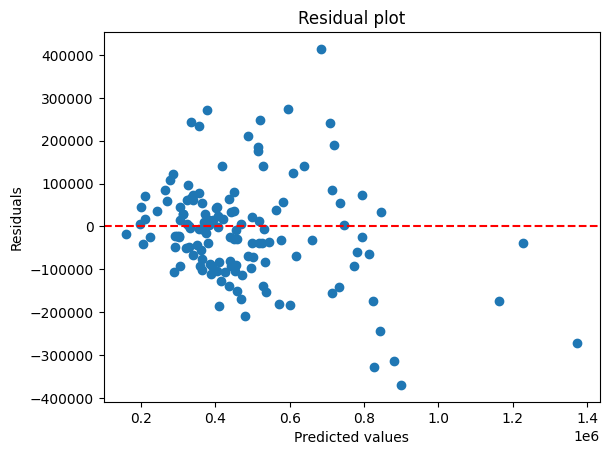

In [124]:
# === 10. Wykres reszt ===
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


In [125]:
# === 11. Predykcja dla nowych danych ===

X_new = pd.DataFrame(
   [[47, 'Łódź Bałuty', 2, True, 16.0, '6 dni temu']],
   columns=['area_m2', 'locality', 'rooms', 'owner_direct', 'photos', 'date_posted']
)
predicted_price = pipeline.predict(X_new)
print(f"Predykowana cena: {predicted_price[0]:,.2f} zł")

Predykowana cena: 388,887.84 zł
